<div style="text-align:center">
<h1>Introducing Pandas</h1>
<h2>7SSG2059 Geocomputation 2018</h2>
</div>

# The Importance of Data Exploration

After a couple of weeks getting to grips with Python itself, we're now going to start working with some real data. 


One of the first things that we do when working with any new data set is to familiarise ourselves with it. There are a _huge_ number of ways to do this, but there are no shortcuts to:

<ul>
  <li>a. Reading about the data (how it was collected, what the sample size was, etc.)</li>
  <li>b. Reviewing any accompanying metadata (data about the data, column specs, etc.)</li>
  <li>c. Looking at the data itself at the row- and column-levels</li>
  <li>d. Producing descriptive statistics </li>
  <li>e. Visualising the data using plots </li>
</ul>

In fact, you should use _all_ of these together to really understand where the data came from, how it was handled, and whether there are gaps or other problems. If you're wondering which comes first, the concept of  _start with a chart_ is always good.  But this week we want you to get a handle on pandas itself so although we will do some plotting of charts, we'll focus on a-d. There will be much more on plotting charts next week.

# 1. LSOA Data

In much of the remainder of the module, and for your final report, we will be working with data for London that are aggregated spatially into geographical units known as Lower Super Output Area (LSOAs). Hence, we will refer to these data as the _LSOA data_. 

The boundaries of LSOAs are adminstered by the [Office for National Statistics](https://www.ons.gov.uk/) (ONS) and used to analyse [UK Census]() and other data. You can read more about [the ONS coding system](https://en.wikipedia.org/wiki/ONS_coding_system), find out about the [UK census geography](https://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeography), and explore [census data at LSOA level for London](http://londondatastore-upload.s3.amazonaws.com/instant-atlas/lsoa-atlas1/atlas.html).   

The data set we have created and which you can use and build on is designed to provide a diverse range of data types so that there is 'something for everyone' -- physical and human geographer alike (and anything in between!) -- to work with. The sources and types of data in the initial LSOA dataset we will examine are: 
* [London Data Store](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london) provides the geography and some basic census data 
* [OS Greenspace](https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-greenspace.html) provides data about the amount of greenspace
* [OS VectorMap](https://www.ordnancesurvey.co.uk/business-and-government/products/vectormap-district.html) (District) provides data about distances to major roads
* [NOMIS](https://www.nomisweb.co.uk/census/2011) provides more detailed census data
* [AirBnB](http://insideairbnb.com/get-the-data.html) provides publicly available information from the AirBnB website

Later in term we will see how we can 'add' additional (air pollution) data to this initial dataset, but this is more than enough to be going on with for now! Don't spend too long looking at these links now, as we'll get on with exploring the data themselves. 

We have created a metadate file in Excel that provides information about the variables contained in the LSOA data. Look at that [metadata file](https://github.com/kingsgeocomp/geocomputation/raw/master/Data/LSOA_metadata.xlsx) now (file should auto-download; also available on KEATS). 

Come back to this section later to look at the links make sure you understand how what the data represent, how they were collected, etc. as this is important understanding that will support your data analyses.    

Now, let's move on to see how Pandas provdes functionality that can help us to explore analyse data than using the basic Python data types. 

# 2. What is Pandas?

Pandas stands for 'Python Data Analysis Library'; it is designed to provide data scientists working in Python with a set of powerful tools to load, transform, and process large-ish data sets. As a result, it has become something of a *de facto* standard for online tutorials and many of the lessons that you can find online will make use of pandas at some point.

Beyond what we provide below there are [numerous](http://lmgtfy.com/?q=introduction+to+pandas+python) useful introductions; [one of our favourites](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) is from Greg Reda, and there are some [good videos](https://www.youtube.com/watch?v=-NR-ynQg0YM&list=PLJ5Y5hxm-0W7rOOYBHf6KC6QNnWOi09kh) on [our YouTube channel](https://www.youtube.com/channel/UCzUfC-2ETruIzZuVajRub1A). And of course, there’s [TONS of stuff](http://stackoverflow.com/questions/tagged/pandas) on StackOverflow. If you want an actual physical book, you might try [McKinney (2017)](http://shop.oreilly.com/product/0636920050896.do).

However, one thing you will really want to bookmark is [the official documentation](http://pandas.pydata.org/pandas-docs/stable/) since you will undoubtedly need to refer to it fairly regularly. _Note_: this link is to the most recent release. Over time there will be updates published and you _may_ find that you no longer have the most up-to-date version. If you find that you are now using an older version of pandas then you'll need to track down the _specific_ version of the documentation that you need from the [home page](http://pandas.pydata.org).

You can always check what version you have installed like this:
```python
import pandas as pd
print pd.__version__
```
*Note*: this approach isn't guaranteed to work with _every_ package, but it will work with most of them. Remember that variables and methods starting and ending with '`__`' are **private** and any interaction with them should be approached very, very carefully.

First we need to import pandas:

In [92]:
import pandas as pd

What we have done here is `import` pandas with an alias, _pd_. So now we can call pandas using `pd` instead of having to type out pandas in full each time (remember, programmers are lazy). You will need to run a line of code like this any time you want to use pandas as you will always need to import the pandas package; you can use whatever alias you like but we'll assume you always use `pd` in GSA modules.  

If pandas imported properly, we can now look at the help file for a pandas `DataFrame` using:

In [2]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      Ran

Wow! The help documentation for the DataFrame is not just a bit longer than anything we've seen before, it's massively longer! That's because pandas is much more sophisticated than anything we've looked at before. There's probably quite a lot of intimidating terminology in there too... Right from the start we get things like "Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)." 

## You've already invented pandas!

Here's the thing: in the [last notebook](https://raw.githubusercontent.com/kingsgeocomp/geocomputation/master/Practical-02-Functions%20and%20Packages.ipynb) we came close to writing something like pandas from scratch. That's because pandas takes a column-view of data in the same way that our Dictionary-of-Lists did, it's just that it's got a lot more features than our 'simple' tool does. That's why the documentation is so much more forbidding and why pandas is so much more powerful.

But at its heart, a pandas `DataFrame` (`df` for short) is a collection of data `Series` (i.e. columns) with an index. Each `Series` is like one of our column-lists from the last notebook. And the `df` is like the dictionary-of-lists that held the data together. You've seen this before, so you already _know_ what's going on... or at least you now have an _analogy_ that you can use to make sense of pandas:
```python
myDataFrame = {
    '<column name 1>': <Series 1>,
    '<column name 2>': <Series 2>,
    '<column name 3>': <Series 3>
}
``` 

Let's start with `Series` before loading the LSOA data as a `df`

# 3. Pandas `Series`
The official documentation for `Series` is [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). But as [Greg Reda](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) puts it so clearly; _“a Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labelled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.”_ 

This indexing is very similar to what we have used in the past for lists. 

In [93]:
s = pd.Series([7, 'Bristol', 3.14, -1789, 'Happy Birthday!'])
print(s)

0                  7
1            Bristol
2               3.14
3              -1789
4    Happy Birthday!
dtype: object


Then, to get to item 1 in the `Series`:

In [4]:
print(s[1])

Bristol


Looks pretty similar to how we would index (access) a list, right?

But one of neat things about pandas `Series` is that you can set the index yourself. For example:

In [5]:
mySummary = pd.Series([7, 1, 3.23, 0.88],  index=['max', 'min', 'mean', 'std'])

This about how this looks a little like creating a Dictionary with keys... 

Then we can access values in the `Series` using the `index`:

In [6]:
print(mySummary['min'])

1.0


Or, we could do something like:

In [7]:
print(mySummary.min())

0.88


Notice the difference between the output for the last two `print()` statements? 

This is because we used two different ways to access the contensts of the `Series`:
1. the first uses the index value we specified (_min_) to get the second value in the `Series`, 
2. the second uses the `min()` [method](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats) to find the minimum value in the Series. 

Make sure you understand how these two lines of code differ and why their output is different – ask if you’re not sure. 

We can also use _Boolean indexing_ (remember this from Code Camp notebook 4?) to select or filter particular elements of the `Series` that meet certain conditions using logical operators like `==` or `>` (so this is like a conditional statement). For example, let's create a new `Series`:

In [8]:
mySeries = pd.Series([100, 200, 300, 400], index = ['one', 'two', 'three', 'four']) 

Then query to find all elements of the `Series` with values greater than 250:

In [9]:
mySeries[mySeries > 250]

three    300
four     400
dtype: int64

See if you can work out what  the last line of code is doing. It’s quite tricky:
1.	First it runs the conditional for all elements of `mySeries` (i.e. checking which values are greater than 250), 
2.	This produces a Boolean Series of `True`/`False` values the same length as the original series
3.	THEN it says return (in this case, print out) all the elements in `mySeries` for which the partner values in the Boolean series are `True`. 

Think about it. 

Here’s another example:

In [10]:
myLatitudes  = pd.Series([7063197, 6708480, 6703134, 7538620], index = ['Liverpool', 'Bristol', 'Reading', 'Glasgow'])

myLatitudes[myLatitudes < 7000000]

Bristol    6708480
Reading    6703134
dtype: int64

# 4. Pandas `DataFrames`

We’ll work more with `Series` as we go along. But usually, we have more than just a single row or column of data (i.e. one-dimensional), often we have a table or a matrix (two-dimensional). To work with these two-dimensional data in pandas we use the data structure called `DataFrame`. We saw the help documentation for this above, but hopefully the rest of this notebook will be a little more comprehensible... 

Official documentation for DataFrame is [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). But again, [Greg Reda](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) puts it a little more intuitively; _“A DataFrame is a tabular data structure comprised of rows and columns, akin to a spreadsheet, database table ... **You can also think of a `DataFrame` as a group of `Series` objects that share an index (the column names).**”_ 

Or, in terms of Dictionaries-of-Lists (what you did last week), a `DataFrame` could be thought of as a `dict` of `list` objects that share a `key`. 

Indeed, we could actually create our own `df` from a Dict-of-Lists:

In [11]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

pd_d = pd.DataFrame(d)

print(type(pd_d))
print(pd_d)

<class 'pandas.core.frame.DataFrame'>
   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0


Bet the nerds found that one cool! (we did). 

Just to clarify what we did there:
1. We created an object `d`, which is a dict-of-lists, using basic python 
2. We created an object `pd_d`, which is a pandas `DataFrame`
3. We printed the type of the `pd_d` object (to check it really is a pandas `DataFrame`)
4. We printed the pandas `DataFrame` itself

Check you understand this and ask if you're not sure. 

# 5. Reading and Writing Data 

It’s very infrequent that we would actually want to write code to create a `DataFrame`. Usually, we read existing data into the `df` - this could be a data stored on a remote computer (i.e. on the Internet) or from a local file (on your HDD). After manipulation and analysis we may also want to save a `df` for later use. To faciliate reading (and writing) files, pandas has a [variety of functions](http://pandas.pydata.org/pandas-docs/stable/io.html).

We'll look at how we read and write existing data using pandas functions by taking three steps:
1. read the LSOA data file from a remote location
2. write the LSOA data to a file on your local HDD
3. (re)read the LSOA data from your local HDD.

You do _not_ need to run this entire process of three steps every time you start this or any other notebook. We are just demonstrating the flexibility of pandas. In future you will likely want to just work with your local file. 

We have stored the initial LSOA data online in a file named `LSOA Data.csv.gz`. This file is in [csv format](https://en.wikipedia.org/wiki/Comma-separated_values), but compressed (using the [gzip algorithm](https://en.wikipedia.org/wiki/Gzip)) to reduce data storage and transfer demands. 

The pandas `read_csv` function can read data saved in csv format _and_ which has been compressed directly into a `df`. Similarly, the `to_csv` function can write a pandas `df` in csv format _and_ compress the file using gzip.


### Read a remote data file in pandas

Assuming we're connected to the Internet, we can read data from a remote server into the memory of our computer so that we can work with it: 

In [15]:
my_df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA%20Data.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types


Read the code above and see if you can work out roughly how it is structured. See how we used a URL to provide the address of the online data. Using the `read_csv` function means pandas assumes the data we are reading is in comma separated values (csv) format. However, because we indicate that the data file is compressed (which is handy when reading data remotely to reduce download times) pandas automatically knows it needs to uncompress the data before reading it into memory. Discuss with someone if you want to check how the code is structured. 

All being well, the code above should not have produced an error when running. To see the result of running the code, let's check what type of object `my_df` is: 

In [16]:
type(my_df)

pandas.core.frame.DataFrame

If you see `<class 'pandas.core.frame.DataFrame'>` that's great! This is telling that you that you have created a pandas `df`. Let's have a quick look at the `DataFrame` we've created:

In [17]:
my_df.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,2589.0,152.294118,146.0,14.0,1.0,2.0,11.0,6.0,17.0,133320.768859
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,2697.0,149.833333,117.5,12.0,5.0,1.0,13.0,5.0,18.0,226191.273063
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,1049.0,87.416667,89.5,7.0,5.0,0.0,12.0,0.0,12.0,57302.966528
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,5360.0,105.098039,95.0,36.0,14.0,1.0,30.0,21.0,51.0,190738.760508
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,30.0,30.000000,30.0,0.0,1.0,0.0,1.0,0.0,1.0,144195.846859


We'll learn more about the `head()` function a little bit later, once we've finished looking at how reading and writing data works. 

For now, think about how useful to pandas `read_csv` function is: instead of having to write some kind of _readRemoteCSV_ function ourselves, and then manually create a Dictionary-of-Lists from that remote file, we just told pandas to read it for us and it automagically converted it to a data structure that we we will be able use lots of functions to analyse (as we'll see below). You'll notice that it even figured out where the column names were. 

### Writing a `DataFrame` to a local file 

Writing a file to disc (i.e. saving it for later use), is just as easy as reading the deata. The following code writes the `my_df` `df` to a csv file using the `to_csv` pandas method: 

In [18]:
my_df.to_csv('lsoa.csv', index=False)

There are two things to note here: 
1. we have passed a value of `False` to the `index` argument - read what that does [in the documentation](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)
2. we have passed a value of `lsoa.csv` as a filename to use for the csv file created

As the filename does not specify the full path, the data will be written to whatever your current working directory is. For a Jupyter notebook like this, that means the directory where the notebook itself is saved. Use Finder or File Explorer to go view the file you have just saved to HDD. 

Make sure you can find the file! It is important you understand where and how pandas and python write data. Ask if you need help.

You may have noticed that the csv file is reasonablly large in terms of the space used on the HDD (~7 MB). If we want to save some space we could use the gzip compression option:

In [19]:
# Save this locally to avoid having to re-download it every time we start this notebook
my_df.to_csv('lsoa.csv.gz', compression='gzip', index=False)

Check you can find the file just created on your HDD. 

It is up to you to decide how you want to store your data, so think about these two different methods what they entail for reading data back into a `DataFrame` later (Google or ask for advice on [best practice](https://library.stanford.edu/research/data-management-services/data-best-practices) if you want).  

Before we read the data back in, to ensure the reading works properly we'll delete the`my_df` object:

In [20]:
del(my_df)

print(type(my_df))

NameError: name 'my_df' is not defined

That's one bit of code you actually _do_ want an error from! The error shows we have successfully removed the `df` object from memory (so python can't find it when we ask what type it is).  

### Reading data from a local file to a pandas `DataFrame`

Above, we wrote the data to two types of file - one compressed and one uncompressed. Reading these files back into memory from a local HDD is just as easy as reading from a remote location. 

First, reading the compressed file:

In [89]:
gz_df = pd.read_csv('lsoa.csv.gz', compression='gzip') 
print(type(gz_df))

AttributeError: 'Series' object has no attribute 'read_csv'

Similarly for the the uncompressed csv file:

In [101]:
my_df = pd.read_csv('lsoa.csv')
print(type(my_df))

<class 'pandas.core.frame.DataFrame'>


This is all pretty straightforward _assuming python knows where your data are stored on the HDD_. Here, because we do not provide a full path the file is read from the current directory. In this case that should be oay (because we only just wrote the data to disk, without specifying a location), and we can see the read must have been at least partially successful as there was no error message and the object created is a pandas `df`. 

However, if your data are saved in a different location you will need to provide the full path to the location of a file on your HDD. For example, assuming you have a file named _lsoa2.csv_ in your downloads, you might do something like this:

In [ ]:
new_df = pd.read_csv('C:\Users\K1111111\Downloads\lsoa2.csv')

Unless my some miraculous coincidence your username is _k1111111_ and you really _do_ have a file named _lsoa2.csv_ in your Downloads folder, you should receive an error when you run the code above. Read the error and check you can see where python is trying to tell you it can't find the file you're trying to read. You may get such an error in future if you mis-specify a path or mis-spell a file name (so get used to this - don't be scared of error messages, they are _trying_ to help you!). 

Also remember that how you specify the path will differ between Windows (using \) and Max (using /) - read more [here](https://www.howtogeek.com/181774/why-windows-uses-backslashes-and-everything-else-uses-forward-slashes/) if you're interested.

### Quickly viewing the contents of a `DataFrame`

So we think we've read our data in correctly, but really need to check by looking at it. Later in the practical we'll see some of the useful plotting functionlity provided by pandas. 

But how can we quickly check the contents of what has been created without plotting? This is where the pandas `head()` method is useful:

In [23]:
my_df.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,2589.0,152.294118,146.0,14.0,1.0,2.0,11.0,6.0,17.0,133320.768859
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,2697.0,149.833333,117.5,12.0,5.0,1.0,13.0,5.0,18.0,226191.273063
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,1049.0,87.416667,89.5,7.0,5.0,0.0,12.0,0.0,12.0,57302.966528
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,5360.0,105.098039,95.0,36.0,14.0,1.0,30.0,21.0,51.0,190738.760508
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,30.0,30.000000,30.0,0.0,1.0,0.0,1.0,0.0,1.0,144195.846859


All being well, you should have just printed the first five lines of the `DataFrame`. (If not, you might need to go back to code above to read the data into the `my_df` object - ask if you need help).   

You might be able to note how there are 42 columns (`Series`) in this `df` - so many that they likely didn't all print across the top! (look for the ... between some of the columns indicating missing columns)  

In this circumstance we can exploit some of the [attributes](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) of the `df`. For example the `shape` attribute is a tuple:

In [24]:
print(my_df.shape) 

(4835, 42)


This should show you that `my_df` has 4835 rows and 42 columns. To print this more nicely we could do something like:

In [25]:
print("Number of columns is " + str(my_df.shape[1]))
print("Number of rows is " + str(my_df.shape[0]))

Number of columns is 42
Number of rows is 4835


Check you understand what's going on there; how did we access the column and row values individually?

Note that we use `shape` not `shape()` - this is because `shape` is an attribute of the `DataFrame`, not a pandas method (function). You can compare many of the attributes and methods of pandas `DataFrames` [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). For some [unknown](https://stackoverflow.com/a/19483025) reason, some attributes are not shown in the full documentation. For example, the `columns` _attribute_ is also useful: 

In [26]:
print(my_df.columns)

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'GreenspaceArea', 'RoadsArea',
       'Owned', 'SharedOwnshp', 'SocialRented', 'PrivateRented', 'RentFree',
       'ORroomsM1', 'ORbedsM1', 'RoomsHH', 'BedsHH', 'White', 'MultiEthnic',
       'Asian', 'Black', 'OtherEthnic', 'MedianIncome', 'SumPrice',
       'MeanPrice', 'MedianPrice', 'EntireHome', 'PrivateRoom', 'SharedRoom',
       'SmallHost', 'MultiHost', 'PropertyCount', 'Area'],
      dtype='object')


A useful `DataFrame` _method_ to view all `Series` (column) names is `columns()`:

Or to return the columns names as `list` of `values`:

In [27]:
print(my_df.columns.values)

['LSOA11CD' 'LSOA11NM' 'MSOA11CD' 'MSOA11NM' 'LAD11CD' 'LAD11NM' 'RGN11CD'
 'RGN11NM' 'USUALRES' 'HHOLDRES' 'COMESTRES' 'POPDEN' 'HHOLDS' 'AVHHOLDSZ'
 'geometry' 'GreenspaceArea' 'RoadsArea' 'Owned' 'SharedOwnshp'
 'SocialRented' 'PrivateRented' 'RentFree' 'ORroomsM1' 'ORbedsM1'
 'RoomsHH' 'BedsHH' 'White' 'MultiEthnic' 'Asian' 'Black' 'OtherEthnic'
 'MedianIncome' 'SumPrice' 'MeanPrice' 'MedianPrice' 'EntireHome'
 'PrivateRoom' 'SharedRoom' 'SmallHost' 'MultiHost' 'PropertyCount' 'Area']


Note the subtle difference between the outputs of the last two lines of code (e.g. one starts, `Index`, the other does not; one has only [ ], the other ( ) and [ ]). 

The list of `column.values` points us to a way that we can read in only a subset of the columns from our original data file by specifying a subset to read in: 

In [102]:
colnames = ['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD',
            'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES',
            'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ']

sub_df = pd.read_csv('lsoa.csv', usecols = colnames)
print(sub_df.shape)
sub_df.head()

(4835, 14)


,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,2589.0,152.294118,146.0,14.0,1.0,2.0,11.0,6.0,17.0,133320.768859
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,2697.0,149.833333,117.5,12.0,5.0,1.0,13.0,5.0,18.0,226191.273063
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,1049.0,87.416667,89.5,7.0,5.0,0.0,12.0,0.0,12.0,57302.966528
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,5360.0,105.098039,95.0,36.0,14.0,1.0,30.0,21.0,51.0,190738.760508
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,30.0,30.000000,30.0,0.0,1.0,0.0,1.0,0.0,1.0,144195.846859


What we have done here is create a list of the column names we want (called `colnames`) and specified this in the `read_csv` method through the `usecols` argument. Also note that there are **many** other arguments we could pass to `read_csv`, as shown [in the documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv). 

When viewing the current state of `sub_df` using `shape` we can see we have only 14 columns, and `head` shows the first few lines of those columns. 

We can also read in only a subset of the rows, which can be useful when working with Really Big datasets. For example, while the LSOA data at ~7MB has only around 40 columns and 4,800 rows, larger data sets like the London [InsideAirBnB data](http://insideairbnb.com/get-the-data.html) come in at nearly 50MB, and the OS' OpenRoads data set is more than 500MB! Reading and writing that amount of data will slow things down quite a bit! Sometimes it's easier to work with only a portion of the data while we are doing our coding and then, once we know that we've written things correctly, we do our analysis on the whole data set. 

One way to achieve this right at the start is to specify the number of rows (abbreviated to `nrows`) that you want to load in `pandas`. Using our LSOA data set, for instance, do we really need to start out with all >4,000 rows? Or could we work with 'just' 1,000 to get things started? If we set up our analysis then the answer is: it doesn't matter! We should be able to just run the analysis on the subset of data and then re-run it on the _entire_ data set later (by changing the number of lines we read into memory right at the start of the analysis process).

So to read only 1,000 rows and only the London Data Store columns:

In [103]:
sub_df = pd.read_csv('lsoa.csv', usecols = colnames, nrows=1500)
print(sub_df.shape)

(1500, 14)


You'll see a lot more later in term how to more effectively subset and sample data, but this should speed things up quite a bit until we're ready to deal with the whole data set!

That's right, pretty much exactly the same as for the uncompressed file. That's because pandas recognizes the compression tye and uncompresses for us!

So a quick recap of what we've just done before moving on. We:
1. read the LSOA data file from a remote location;
2. wrote the LSOA data to a file on your local HDD in two different formats (compressed and uncompressed);
3. (re)read the LSOA data from your local HDD (in two different formats);
4. explored some different ways to quickly view the shape and content of data that we have read. 


## Exercise: Writing and Reading Data
1. Write the LSOA `my_df` `DataFrame` object to a different directory (not the directory this notebook is saved in on your HDD.
2. Delete the `DataFrame` object from memory.
3. Read the data back in from the directory to an object named `new_df` and check it has loaded into memory correctly. 
4. Print the top few lines of `new_df` 

In [ ]:
#your code here

For the remainder of the notebook we will work with the full dataset so read the data back in from the online source:

In [ ]:
my_df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA%20Data.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types

Onwards, to data description

# 6. Describing Numerical Data in Pandas

Let’s calculate some descriptive statistics for our data. Handily, there is a method we can apply to `DataFrame` objects that returns the standard descriptive statistics:

In [30]:
my_df.describe()

,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1673.634000,1656.349333,17.284667,75.877600,654.585333,2.577733
std,230.891638,231.366032,58.054605,47.223509,125.781862,0.368413
min,985.000000,943.000000,0.000000,1.300000,404.000000,1.500000
25%,1532.000000,1513.750000,0.000000,43.750000,568.750000,2.300000
50%,1639.500000,1627.000000,0.000000,66.750000,636.500000,2.600000
75%,1785.250000,1767.000000,11.000000,99.525000,717.250000,2.800000
max,2886.000000,2868.000000,930.000000,325.200000,1236.000000,4.000000


That's a bit faster than trying to calculate all these summary stats in Excel, right? 

Just by calling `describe()`...
1. We've asked Python to describe the `DataFrame` and it has returned a set of columns (actually, it's `DataFrame` itself as we'll see below) with descriptive metrics for each.
2. Note what is _missing_ from this list: where are `LSOA11CD`, `LSOA11NM`, and a couple of the other columns? Can you think why they weren't reported in the descriptives?

(As you work through the description code below, you may want to refer back to the shape and contents of the `DataFrame` above)

And we don’t just have to settle for the standard descriptive statistics the `describe()` method [gives us](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html). We can also specify particular percentiles of the data that we would like to view. This is done using the `percentiles` argument. For example to get the 1st and 99th percentiles we would use:

In [31]:
my_df.describe(percentiles = [0.01, 0.99])

,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1673.634000,1656.349333,17.284667,75.877600,654.585333,2.577733
std,230.891638,231.366032,58.054605,47.223509,125.781862,0.368413
min,985.000000,943.000000,0.000000,1.300000,404.000000,1.500000
1%,1232.970000,1202.940000,0.000000,5.400000,452.000000,1.800000
50%,1639.500000,1627.000000,0.000000,66.750000,636.500000,2.600000
99%,2457.390000,2456.400000,222.370000,234.802000,1036.080000,3.600000
max,2886.000000,2868.000000,930.000000,325.200000,1236.000000,4.000000


Of course, maybe you don't want the report for all columns. Maybe you're just interested in one column:

In [32]:
my_df.POPDEN.describe()

count    1500.000000
mean       75.877600
std        47.223509
min         1.300000
25%        43.750000
50%        66.750000
75%        99.525000
max       325.200000
Name: POPDEN, dtype: float64

Notice that `dtype` at the end: that tells us the _data type_ is a 64-bit float. Remember, you can have strings, floats, integers, booleans, etc. in a `DataFrame`.

But the really crucial thing is that this introduces _one_ of the two ways that we access a `Series` in pandas: `<data frame>.<series name>.method`. So we could get similar information on the `HHOLDS` column with:
```python
df.HHOLDS.describe()
```
And so forth.

Also note that the output of the above returns a `Series` which we can save in memory and query later:

In [33]:
pdesc = my_df.POPDEN.describe()
type(pdesc)

pandas.core.series.Series

The `info()` method is also useful to find the type of values in each field:

In [34]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
LSOA11CD     1500 non-null object
LSOA11NM     1500 non-null object
MSOA11CD     1500 non-null object
MSOA11NM     1500 non-null object
LAD11CD      1500 non-null object
LAD11NM      1500 non-null object
RGN11CD      1500 non-null object
RGN11NM      1500 non-null object
USUALRES     1500 non-null int64
HHOLDRES     1500 non-null int64
COMESTRES    1500 non-null int64
POPDEN       1500 non-null float64
HHOLDS       1500 non-null int64
AVHHOLDSZ    1500 non-null float64
dtypes: float64(2), int64(4), object(8)
memory usage: 164.1+ KB


Notice that describing a text column gives us an `object` data type because a `String` is a complex object, not a simple `float` or `int`. This now shows how `describe()` (above) automatically ignores non-numeric fields and only gives summaries for numeric fields (sensible!). 

In addition to `describe()` there are lots of other methods we can use to get descriptive statistics (and other derived variables) from our `DataFrame`. In general, we can ask the pandas to quickly work out a derived statistic in a `DataFrame` (such as the mean) by operating on a `Series`: `<data frame>.<series>.method()`. 

For example, for the mean of the `HHOLDS` `Series`:

In [35]:
my_df.HHOLDS.mean()

654.5853333333333

This is a pretty easy way to calculate the mean of a `Series`, but look at how many decimal places the value has been reported to. More than 10 decimal places is too many - we just can't be that precise with these data. And if we created a table of values with this many decimal places we wouldn't be able to read anything very easily. So let's look briefly at how to present numeric values as `strings` with a specified level of precision:

In [36]:
print("The mean of HHOLDS is {0:.2f}".format(my_df.HHOLDS.mean()))

The mean of HHOLDS is 654.59


Notice here that we have used a new `string` method named `format()`, to which we passed the number we want to output (in this case result of `my_df.HHOLDS.mean()`). The bit that might look particularly unfamiliar is the `{0:.2f}` at the end of the `string`. 

In order to understand how this works for formatting the results in a nice, systematic way you could have a read of [this](http://www.python.org/dev/peps/pep-3101/ ) 'pep' which tells us that:
1. `{0}` would just grab the value being passed and stick it into the `string` at this point, but the `:` tells python that we want to give it some more information about how to format the string;
2. the `f` tells python to treat anything it receives as a `float` (even if the variable is an `int`);
3. the `.2` indicates we want only only two decimal places. 

So if we wanted four decimal places:

In [37]:
print("The mean of HHOLDS is {0:20.4f}".format(my_df.HHOLDS.mean()))

The mean of HHOLDS is             654.5853


And the `20` before the `.` indicates that we want the entire number to have 20 digits (but here 13 of those digits are actually white space because there are only 3 significant figures before the decimal place). 

Read [the documentation](https://www.python.org/dev/peps/pep-3101/) and see if you can work out why even though we asked for 40(!) digits, the `<` means the value is still left aligned.

In [38]:
print("The mean of HHOLDS is {0:<40.3f}".format(my_df.HHOLDS.mean()))

The mean of HHOLDS is 654.585                                 


You might want to have a [look at the documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#series): it's rather a long list, but most of your descriptive stats are on that page in the [Cumulative / Descriptive Stats](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats) section, and there's also lots of information about methods for [strings](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) and [categorical data](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical).

## Exercises: Descriptive Stats
Quickly calculate the following descriptive statistics for the given variable for all London LSOAs:
1. The maximum value of Median Income 
2. The number households in the LSOA with smallest area
3. The total number (cumulative sum) of Asian/Asian British people in London LSOAs

In [ ]:
#1
#your code here

#2
#your code here

#3
#your code here


# 7. Selecting `DataFrame` Contents 

What about if we wanted to select or access certain elements (i.e. numbers in) a `DataFrame`? That is, how do we access the contents of specific parts of the data frame, like accessing elements of a list?

Rather than see how this works with the huge LSOA `DataFrame`, let's work with a smaller one. The describe method returns a `DataFrame` so we could create a smaller `DataFrame` by assigning the output of the `describe()` method to an object. For example:

In [105]:
descr = my_df.describe()
print(type(descr))
descr

<class 'pandas.core.frame.DataFrame'>


,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,GreenspaceArea,RoadsArea,Owned,SharedOwnshp,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
count,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4.835000e+03,4.835000e+03,4835.00000,4835.000000,...,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4.835000e+03
mean,1690.577249,1669.844881,20.732368,95.937497,675.526991,2.519090,2.272510e+04,1.104206e+05,325.99938,8.708997,...,1069.767528,63.995558,53.261117,5.617373,5.378283,0.146846,8.137332,3.005171,11.142503,3.254407e+05
std,263.566401,257.715521,80.966217,61.223649,133.601312,0.390042,1.286166e+05,1.574756e+05,135.29957,15.036100,...,2168.377424,55.191862,40.363136,10.829251,7.245462,0.715936,11.051360,7.649853,16.933873,6.290090e+05
min,985.000000,878.000000,0.000000,1.200000,404.000000,1.400000,0.000000e+00,0.000000e+00,5.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.690171e+04
25%,1530.000000,1512.000000,0.000000,51.950000,590.500000,2.300000,0.000000e+00,1.654123e+03,224.00000,2.000000,...,50.000000,32.196429,30.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.335480e+05
50%,1654.000000,1639.000000,0.000000,83.300000,653.000000,2.500000,0.000000e+00,7.647924e+04,329.00000,4.000000,...,282.000000,58.166667,49.000000,1.000000,3.000000,0.000000,4.000000,0.000000,5.000000,2.033552e+05
75%,1817.000000,1798.000000,11.000000,128.400000,750.000000,2.700000,3.403367e+03,1.503951e+05,430.00000,9.000000,...,1223.500000,86.902256,73.000000,7.000000,7.000000,0.000000,11.000000,3.000000,15.000000,3.190558e+05
max,4933.000000,3063.000000,2172.000000,684.700000,1236.000000,4.100000,3.849621e+06,3.235963e+06,710.00000,176.000000,...,34815.000000,1208.333333,500.000000,182.000000,97.000000,19.000000,123.000000,152.000000,264.000000,1.580873e+07


Check you understand the structure of this `DataFrame`: the columns are `Series` and indexes are specified by what look like 'row names' above.

We can select what elements of the `DataFrame` we want using the `Series` (column) names and/or the indexes. As proof, we can check these using the `columns` and `index` attributes:

In [106]:
print(descr.columns.values)
print(descr.index.values)

['USUALRES' 'HHOLDRES' 'COMESTRES' 'POPDEN' 'HHOLDS' 'AVHHOLDSZ'
 'GreenspaceArea' 'RoadsArea' 'Owned' 'SharedOwnshp' 'SocialRented'
 'PrivateRented' 'RentFree' 'ORroomsM1' 'ORbedsM1' 'RoomsHH' 'BedsHH'
 'White' 'MultiEthnic' 'Asian' 'Black' 'OtherEthnic' 'MedianIncome'
 'SumPrice' 'MeanPrice' 'MedianPrice' 'EntireHome' 'PrivateRoom'
 'SharedRoom' 'SmallHost' 'MultiHost' 'PropertyCount' 'Area']
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']


So to get the value `descr` (as we could for any `DataFrame`) we can use the names of the columns and indexes. For example to access values for the `POPDEN` `Series`:

In [107]:
popd = descr.POPDEN 
print("Descriptive stats of POPDEN column: \n" + str(popd))

Descriptive stats of POPDEN column: 
count    4835.000000
mean       95.937497
std        61.223649
min         1.200000
25%        51.950000
50%        83.300000
75%       128.400000
max       684.700000
Name: POPDEN, dtype: float64


The above uses dot notation, which is possible because `Series` names are like attributes of the `DataFrame`. But we can also use square brackets `[]` which allows more direct access to contents of the `DataFrame`:

In [90]:
popd = descr['POPDEN']
print("Descriptive stats of POPDEN column: \n" + str(popd))

Descriptive stats of POPDEN column: 
count    1500.000000
mean       75.877600
std        47.223509
min         1.300000
25%        43.750000
50%        66.750000
75%        99.525000
max       325.200000
Name: POPDEN, dtype: float64


See how the above produces exactly the same same output as dot notation. 

Using brackets, for the `max` `index` of the `POPDENS` `Series`:

In [43]:
pd_max = descr['POPDEN']['max']

print("Maximum of POPDEN column: {0:.2f}".format(pd_max))

Maximum of POPDEN column: 325.20


Now, think about how the next lines of code are different:

In [45]:
pd_max = descr['POPDEN'].max()

print("Maximum of POPDEN column: {0:.2f}".format(pd_max))

Maximum of POPDEN column: 1500.00


The key to the differences here is that in the second example (`descr['POPDEN'].max`) pandas is trying to apply the `max()` method to the `POPDEN` `Series`, whereas in the former (`descr['POPDEN']['max']`) it's clear that we want the `max` `index` of the `POPDEN` `Series`. Think about this and if you're unsure what's going on ask and discuss. 

Continuing with bracket notation, which seems a little safer given the possibel confusion between methods and indexes, we can also access two columns (`Series`) together:

In [46]:
descr_list = descr[['POPDEN', 'HHOLDS']]
print("Descriptive stats of POPDEN and HHOLDS columns: \n" + str(descr_list))

Descriptive stats of POPDEN and HHOLDS columns: 
            POPDEN       HHOLDS
count  1500.000000  1500.000000
mean     75.877600   654.585333
std      47.223509   125.781862
min       1.300000   404.000000
25%      43.750000   568.750000
50%      66.750000   636.500000
75%      99.525000   717.250000
max     325.200000  1236.000000


And because this is a `DataFrame` we can access the `max` `index` for both together:

In [47]:
max_list = descr[['POPDEN', 'HHOLDS']].loc['max']
print("Maximum of POPDEN and HHOLDS columns: \n" + str(max_list))

Maximum of POPDEN and HHOLDS columns: 
POPDEN     325.2
HHOLDS    1236.0
Name: max, dtype: float64


Notice how in this final example we needed to use the `.loc` method; this highlights how there are [different choices for indexing](http://pandas-docs.github.io/pandas-docs-travis/indexing.html#different-choices-for-indexing) (and more [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#indexing-selection)) depending on what we’re working with. Check you understand how the examples above are working, ask if you're not sure.

For example, because of the way `DataFrames` are structured `.loc[]` is useful for getting to the rows of the `DataFrames` (which are actually the indexes of the `Series`):

In [48]:
all_max = descr.loc['max'] 
print("Maximum values of all columns: \n" + str(all_max))

Maximum values of all columns: 
USUALRES     2886.0
HHOLDRES     2868.0
COMESTRES     930.0
POPDEN        325.2
HHOLDS       1236.0
AVHHOLDSZ       4.0
Name: max, dtype: float64


And we can access multiple indexes together:

In [49]:
all_mult = descr.loc[['max','min']] #get multiple together
print("Max and Min values of all columns: \n" + str(all_mult))

Max and Min values of all columns: 
     USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ
max    2886.0    2868.0      930.0   325.2  1236.0        4.0
min     985.0     943.0        0.0     1.3   404.0        1.5


## Selection using integer indexing

Lets quickly see how it’s also possible to use integer indexing in a very similar way to how we would access elements of a basic python list. We do this for `DataFrames` using via `.iloc[]` (where iloc is for integer location):

In [50]:
all_max = descr.iloc[7,]  #row 7, all columns
print(all_max)

USUALRES     2886.0
HHOLDRES     2868.0
COMESTRES     930.0
POPDEN        325.2
HHOLDS       1236.0
AVHHOLDSZ       4.0
Name: max, dtype: float64


In [51]:
td_max = descr.iloc[7,1]   #row 7, column 1
print(td_max)

2868.0


In [52]:
all_mult = descr.iloc[[7,3],]  #rows 7 and 3 for all columns
print(all_mult)

     USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ
max    2886.0    2868.0      930.0   325.2  1236.0        4.0
min     985.0     943.0        0.0     1.3   404.0        1.5


See how the above are like `list` indexing in basic python. Think about this and ask if you're unsure what's going on.  

This integer indexing approach also allows 'slicing', which we'll get to later in term (but some more advanced reading is [here](http://pandas-docs.github.io/pandas-docs-travis/indexing.html#selection-by-position) if you want). 

## Selection using Criteria

Accessing entire columns (`Series`) or rows (indexes) of data (or even individual cells of data) is one thing, but what if we don't know where the information we want is? 

### Selection values greater/less than... 

For example, what if we wanted to find LSOAs with more than 1000 households? 

To do this we use a combination of the selection approaches above in combination with conditionals:

In [108]:
bigLSOAs = my_df[my_df.HHOLDS > 1000.0]
bigLSOAs.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
8,E01000010,Barking and Dagenham 015C,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,2840,2840,...,951.0,52.833333,40.0,8.0,7.0,3.0,9.0,9.0,18.0,348848.342177
121,E01000125,Barnet 024A,E02000047,Barnet 024,E09000003,Barnet,E12000007,London,2779,2690,...,401.0,66.833333,64.0,3.0,3.0,0.0,4.0,2.0,6.0,303157.155695
516,E01000524,Brent 031B,E02000123,Brent 031,E09000005,Brent,E12000007,London,2514,2499,...,772.0,70.181818,56.0,8.0,3.0,0.0,7.0,4.0,11.0,155148.021631
537,E01000548,Brent 028D,E02000120,Brent 028,E09000005,Brent,E12000007,London,2044,2034,...,2569.0,95.148148,95.0,23.0,4.0,0.0,22.0,5.0,27.0,107243.475884
572,E01000583,Brent 032D,E02000124,Brent 032,E09000005,Brent,E12000007,London,2273,2262,...,3592.0,99.777778,87.5,23.0,13.0,0.0,31.0,5.0,36.0,199078.554169


Let's break this down:

* `my_df.HHOLDS` is the HHOLDS column of our data frame `my_df`
* `my_df.HHOLDS > 1000.0` is therefore a kind of _query_ (or _selection_) of rows where the number of households is greater than 1000.0. What it _actually_ does is compare each row's HHOLDS value to 1000.0 and remember if the result is `True` or `False`.
* `my_df[ ... ]` is _like_ what we do with a list when we write: `myList[3:5]` to select the fourth through sixth elements of a list, but in pandas we can _select_ non-sequential rows because we are using a `boolean` array (a.k.a. list) that looks like this: `[False, False, False, True, True, True, ...]`.
* `bigLSOAs = ...` saves the _result_ of the selection into a new data frame called `bigLSOAs`.

You can check what I'm saying about the boolean result using:

In [54]:
my_df.HHOLDS > 1000.0

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8        True
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1470    False
1471    False
1472    False
1473    False
1474    False
1475    False
1476    False
1477    False
1478    False
1479    False
1480    False
1481    False
1482    False
1483    False
1484    False
1485    False
1486    False
1487    False
1488    False
1489    False
1490    False
1491    False
1492    False
1493    False
1494    False
1495    False
1496     True
1497    False
1498    False
1499    False
Name: HHOLDS, Length: 1500, dtype: bool

And we can check that `bigLSOAs` and `my_df` are not the same using `shape`, which gives us the dimensions of the data frame as `(<rows>, <columns>)`:

In [91]:
print(my_df.shape)
print(bigLSOAs.shape)

(1500, 14)
(22, 14)


What this first example means is that _anything_ that can be evaluated to `True` or `False` can be used to select rows from a data frame. 

### Finding maxima and minima

Let's find the LSOAs with the fewest and greatest number of households:

In [55]:
my_df[my_df.HHOLDS == my_df.HHOLDS.min()]

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
1276,E01001296,Ealing 017C,E02000254,Ealing 017,E09000009,Ealing,E12000007,London,1481,1481,0,93.6,404,3.7


In [111]:
my_df[my_df.HHOLDS == my_df.HHOLDS.max()]

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
1219,E01001238,Ealing 015B,E02000252,Ealing 015,E09000009,Ealing,E12000007,London,2868,2868,...,2229.0,74.3,61.5,18.0,11.0,1.0,20.0,10.0,30.0,408474.469002


And to get just the name (`LSOA11NM`) of the LSOAs:

In [57]:
my_df[my_df.HHOLDS == my_df.HHOLDS.min()].LSOA11NM

1276    Ealing 017C
Name: LSOA11NM, dtype: object

In [58]:
my_df[my_df.HHOLDS == my_df.HHOLDS.max()].LSOA11NM

1219    Ealing 015B
Name: LSOA11NM, dtype: object

Check you understand what is happening in this code. First, the row with the fewest/greatest number of households is identified, then we tell pandas we want only the `LSOA11NM` column for that row. 

We could also have done that using bracket notation:

In [59]:
my_df[my_df.HHOLDS == my_df.HHOLDS.min()]["LSOA11NM"]

1276    Ealing 017C
Name: LSOA11NM, dtype: object

In [60]:
my_df[my_df.HHOLDS == my_df.HHOLDS.max()]["LSOA11NM"]

1219    Ealing 015B
Name: LSOA11NM, dtype: object

Whether you use dot notation of brackets is a matter of preference; dot notation is generally deemed more elegant but sometimes things are easier (or only possible) with brackets. 

### Finding a Range Between Known Values

Perhaps we aren't just looking for extremes... how about all of the households with more than 750 households but less than 1000? 

In [61]:
dfRange = my_df.loc[ (my_df.HHOLDS > 750.0) & (my_df.HHOLDS < 1000.0) ]
dfRange.shape

(268, 14)

That example contains a few new things to which you need to pay attention:
1. You'll see that, with mutiple selections, we had to put parentheses around each one -- this is to avoid confusing pandas as to what it should do _first_.
2. We see an '&' (ampersand) which is completely new: it's a logical `AND` that asks pandas to "Find all the rows where condition 1 _and_ condition 2 are both `True`". So it calculates the `True`/`False` for the left side and the `True`/`False` for the right side of the `&`, and then combines them. Look at the appendix to this notebook for more examples and options.
3. We had to a `.loc` on the end of the `my_df` -- the best way to think of this is that it 'freezes' things so as to prepare the data frame to do a search based on the _location_ of some complex selection criteria. We'll see more of this next week.

In a couple of the examples above we have done something that is really bad practice; we have _hard coded_ some values. For example, in the following code we hard coded the value against which to compare `HHOLDS`:

In [63]:
bigLSOAs = my_df[my_df.HHOLDS > 1000.0]

This is bad practice because the value `1000.0` only makes sense in the particular context of the `HHOLDS` variable; if we wanted to move our code elsewhere we're in danger of producing code that doesn't work (at worst), or making additional work for ourselves (at best). 

Much better is to create a variable and then compare against that:

In [64]:
thresh = 1000.0
bigLSOAs = my_df[my_df.HHOLDS > thresh]

In this case the threshold is still relative to the variable, although this code is now more transferable. But often we want to subset data based on the distribution of the data itself. 

### Finding a Range Based on the Distribution

For example, to find the number of LSOAs whose count of households is _greater_ than the mean:

In [65]:
mnHHolds = my_df.HHOLDS.mean()
dfMean = my_df.loc[ my_df.HHOLDS > mnHHolds ]
print("There are {0} sites above the mean household count of {1:.2f}".format(dfMean.shape[0], mnHHolds))

There are 634 sites above the mean household count of 654.59


Notice what we've done with the string formatting there? As the [documentation](https://www.python.org/dev/peps/pep-3101/) indicates, we can pass more than one variable to the `string.format()` method. Here, the first variable (`dfMean.shape[0]`) is placed in the first position (`{0}`) and the second variable (`mnHHolds`) goes in the second position (indicated by `{1...}`). 

Check you understand what is going on here:
1. What is `dfMean.shape[0]`?
2. What is `mnHHolds`?
3. How is the `string.format()` method working?

Okay, so numeric searching is all well and good, but what if I'm interested in finding LSOAs in a particular area?

### Searching for a Category

Let's select the LSOAs in the borough (which is a Local Authority District \[LAD\]) of Ealing. LAD names are indicated in the `LAD11NM` column.

In [66]:
ealingLSOAS = my_df[ my_df.LAD11NM == "Ealing" ]
print("There are " + str(ealingLSOAS.shape[0]) + " LSOAs in Ealing")

There are 193 LSOAs in Ealing


We could make our code a little more flexible for that last example, by allowing passing the search criteria (the borough name) as a variable itself:

In [67]:
b = "City of London"
bLSOAs = my_df[ my_df.LAD11NM == b ]
print("There are " + str(bLSOAs.shape[0]) + " LSOAs in " + b)

There are 4 LSOAs in City of London


Think about how passing the borough name as a variable makes this code more flexible and requires fewer changes in the code to switch between boroughs.  

## Exercises: Selecting Data
Write code to select: 
1. LSOAs with HHOLDS more than 1 SD greater than the mean 
2. LSOAs in Hackney and Tower Hamlets
3. The 'Social rented' column of LSOAs with population density of greater than 300 people per hectare

In [ ]:
#1
print("LSOAs with HHOLDS more than 1 SD greater than the mean: \n")


#2
print("LSOAs in Hackney and Tower Hamlets: \n")


#3
print("The 'Social rented' column of LSOAs with population density of greater than 300 people per hectare: \n")



# 8. Quick (and Dirty) Plotting

One of the first things we should do when exploring a new dataset is plot (aka graph) the data. We've left plotting until a little later in this practical so that we could see some other basic attributes of how pandas stores data. We'll look at plotting and exploratory data analyses in much more detail next week, including using packages other than pandas. 

For now, let's look at the basic plotting functionality pandas provides - in conjunctions with the online documentation for both [DataFrames](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting) and [Series](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting). There are also examples of all [the different types of plots pandas can produce](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

## <span style="color:red;">Important Note for Mac Users</span>

Recent changes in the way that the Mac OS handles the plotting of data means that you need to do certain things in a specific order at the start of any notebook in which you intend to show maps or graphs. Please make a copy of the following code for any notebook that you create and make it the _first_ code that you run in the notebook:

```python
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
```

For non-Mac users it _should_ be:

```python
%matplotlib inline
import matplotlib.pyplot as plt
```

This _should_ enable you to create plots, including in the remainder of this practical!

In [ ]:
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

## Important for both Mac _and_ Windows
For _both_ Mac **and** Windows, you will need to run the next line of code in a notebook before trying to plot anything. The code ensures the plots will appear properly in the notebook. 

In [68]:
# This command tells Jupyter that we want 
# the plots to be shown inline (on this 
# web page). You'll always need to do this
# *once* on a notebook.
%matplotlib inline 

### Out first plots

First, let's see some of the ways we could visualise the distribution of the `Series` in the LSOA dataset:

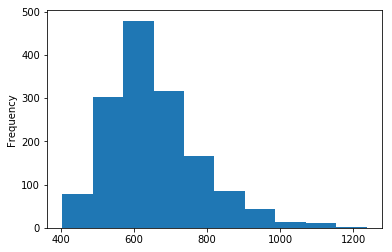

In [69]:
my_df.HHOLDS.plot.hist() # histogram

If the code worked properly you should have just created a standard [histogram](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.hist.html#pandas.Series.plot.hist) plot (if you can't see one, ask for help). 

Similarly, we can produce a [Kernel Density Estimate plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.kde.html#pandas.Series.plot.kde) (modifying the limits of the x-axis to match the histogram above):

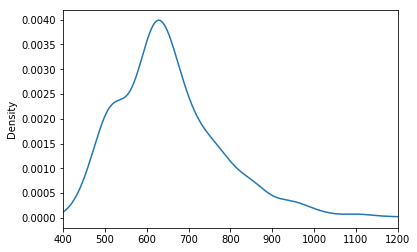

In [70]:
my_df.HHOLDS.plot.kde(xlim = (400,1200)) #kernel density estimate plot

Or a standard [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.box.html#pandas.Series.plot.box):

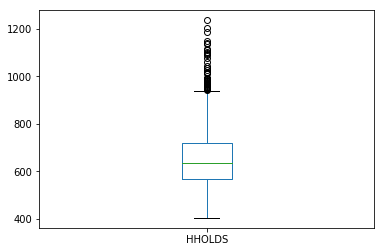

In [71]:
my_df.HHOLDS.plot.box() # boxplot

Kind of handy, no? These aren't the _best_ looking plots, but they are all being generated on-the-fly for you by pandas with no more than a cheery `DataFrame.Series.plot.<plot type>`! Since those plots are all just method calls, many of them take optional parameters to change the colour, the notation (scientific or not), and other options. For example, many of the documentation pages linked to above are rather brief, but include a link to [the general options that can be applied to all `Series.plot`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot) calls.

This is why we like pandas: it allows us to be _constructively lazy_. We don't need to know _how_ a draw a KDE plot (though it always helps if you don't see what you expected), we just need to know that pandas provides a method that will do it for you. And _that_ is why it's always worth having a [look at the documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting). 

We can also plot two variables in a [scatter plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) by applying a plot method to the `DataFrame` (not an individual `Series`):

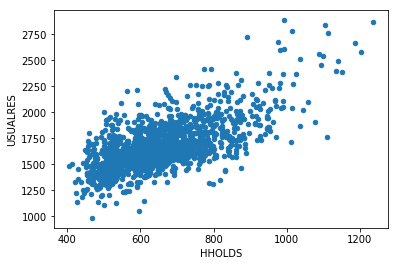

In [72]:
my_df.plot.scatter(x='HHOLDS', y='USUALRES')  #scatter plot

Note how the code above has the form `DataFrame.plot.<plot type>`, not `DataFrame.Series.plot.<plot type>` as in the prior plots. Think about why this then means we need the `x` and `y` arguments. 

Looking at the plot produced, we can see a couple of LSOAs stand out, having much greater numbers of residents relative to the number of households than for other LSOAs. Without producing a simple plot like this, we wouldn't have been able to see this from analysing the numbers.  

We can also vary the size of the point in a plot by some variable:

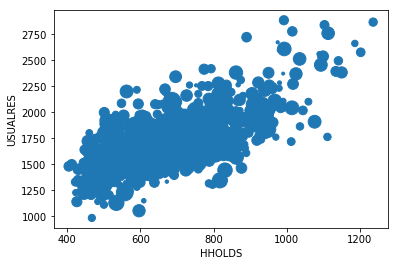

In [82]:
my_df.plot.scatter(x='HHOLDS', y='USUALRES', s=my_df.POPDEN)

And we can plot subsets of our data without creating a new object. See if you can work out what the following code is doing that is different from the last plot:

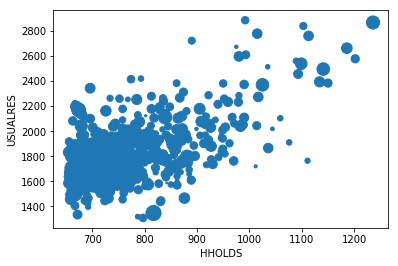

In [84]:
my_df[my_df.HHOLDS > my_df.HHOLDS.mean()].plot.scatter(x='HHOLDS', y='USUALRES', s=my_df.POPDEN)

And pandas allows us to create 'less standard' plots, like a [hex bin plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin):

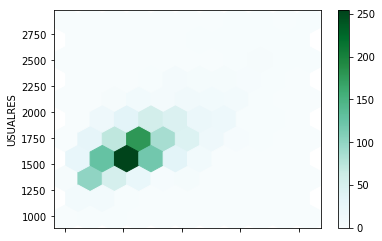

In [85]:
my_df.plot.hexbin(x='HHOLDS', y='USUALRES', gridsize=10)  #hex bin plot

That's just a taste of what the basic plotting functionality of pandas can do. Feel free to explore more yourself but we'll go into more detail, and see [the seaborn package](http://seaborn.pydata.org/index.html), next week. 

## Exercises: Plotting Data
Create plots of the following:
1. A histogram of the distribution of White people across LSOAs
2. A boxplot of Asian people in LSOAs rotated so the box is horizontal (you will need to google how to rotate!)
3. A scatter plot to compare populations of Asian (horizontal axis) vs White (vertical axis) people in LSOAs 

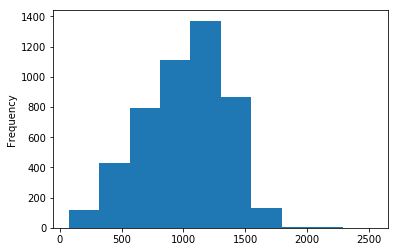

In [109]:
#your code here
my_df.White.plot.hist()

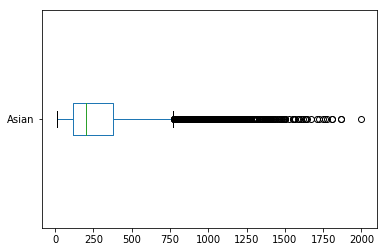

In [113]:
#your code here
my_df["Asian"].plot.box(vert = False)

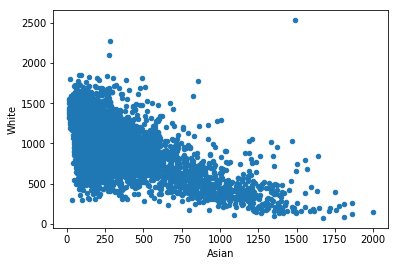

In [114]:
#your code here
my_df.plot.scatter(x = 'Asian', y = 'White')

## Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk), Jon Reades (jonathan.reades@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: pandas, matplotlib